## Searching for bouts for a day of alsa recording

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import glob
import socket
import logging
import pickle
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy import signal


### Fuck matplotlib, I'm using poltly now
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from importlib import reload

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

logger.info('Running on {}'.format(socket.gethostname()))

2023-03-07 15:04:42,219 root         INFO     Running on txori.ucsd.edu


In [4]:
from ceciestunepipe.file import bcistructure as et
from ceciestunepipe.util.sound import boutsearch as bs
from ceciestunepipe.pipeline import searchbout as sb

### Get the file locations for a session (day) of recordings

In [79]:
##### reload(et)
sess_par = {'bird': 's_b1496_23',
           'sess': '2023-03-06', #change this everyday to yesterdays date 
            'acq_software': 'alsa',
           'derived_folder': 'bouts_ceciestunepipe',
           'auto_file': 'bout_auto_file',
           'curated_file': 'bout_curated_file',
           'super_session': 'all-sess-01'}

exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], ephys_software='alsa')

raw_folder = exp_struct['folders']['alsa']
bouts_folder = os.path.join(exp_struct['folders']['derived'], 'bouts_ceciestunepipe')

In [80]:
socket.gethostname().split('.')[0]

'txori'

In [81]:
exp_struct['folders']

{'bird': '/mnt/sphere/speech_bci/raw_data/s_b1496_23',
 'raw': '/mnt/sphere/speech_bci/raw_data/s_b1496_23/2023-03-06',
 'alsa': '/mnt/sphere/speech_bci/raw_data/s_b1496_23/2023-03-06/alsa',
 'kwik': '/scratch/earneodo/s_b1496_23/alsa/kwik/2023-03-06',
 'processed': '/mnt/sphere/speech_bci/processed_data/s_b1496_23/2023-03-06/alsa',
 'derived': '/mnt/sphere/speech_bci/derived_data/s_b1496_23/2023-03-06/alsa',
 'tmp': '/scratch/earneodo/tmp',
 'msort': '/scratch/earneodo/s_b1496_23/alsa/msort/2023-03-06',
 'ksort': '/scratch/earneodo/s_b1496_23/alsa/ksort/2023-03-06/',
 'sort': '/mnt/sphere/speech_bci/derived_data/s_b1496_23/2023-03-06/alsa/'}

### read a session's bouts pandas
- get the location of the file
- load the pandas pickle
- load the search/spectrogram parameters

In [82]:
pd.__version__

'1.4.2'

In [83]:
reload(sb)
hparams, bpd = sb.read_session_bouts(sess_par['bird'], sess_par['sess'], recording_software='alsa', curated=False)

In [84]:
bpd.head(5)

,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,len_ms,syl_in,n_syl,peaks_p,n_peaks,l_p_ratio,waveform,valid_waveform,valid,spectrogram,confusing
0,344685,350680,16544880,16832640,"[1.104917149670852, 4.789307269076302, 4.31249...",0.939757,13.854141,True,/mnt/sphere/speech_bci/raw_data/s_b1496_23/202...,5995,"[[344685, 344715], [345670, 345700], [345985, ...",6,"[1, 198, 261, 279, 304, 586, 594, 623, 642, 93...",14,428.214286,"[-17, -17, -16, -17, -18, -18, -16, -17, -18, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
1,623785,626820,29941680,30087360,"[4.231746223801923, 7.0907901395322, 1.7920205...",0.939757,8.039598,True,/mnt/sphere/speech_bci/raw_data/s_b1496_23/202...,3035,"[[623785, 623815], [626780, 626820]]",2,"[1, 600]",2,1517.500000,"[8, 7, 5, 6, 7, 6, 4, 7, 6, 4, 6, 7, 5, 4, 6, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
2,952755,956610,45732240,45917280,"[0.9076374948399756, 3.5621840631962116, 0.670...",0.939757,11.391271,True,/mnt/sphere/speech_bci/raw_data/s_b1496_23/202...,3855,"[[952755, 952790], [954060, 954095], [956580, ...",3,"[4, 240, 262, 769]",4,963.750000,"[-7, -8, -9, -7, -7, -7, -8, -8, -8, -7, -8, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
3,1703170,1706230,81752160,81899040,"[6.848622769372744, 3.5447723390113626, 1.2335...",0.939757,38.734635,True,/mnt/sphere/speech_bci/raw_data/s_b1496_23/202...,3060,"[[1703170, 1703205], [1706175, 1706230]]",2,"[5, 58, 608]",3,1020.000000,"[-6, 12, 8, 0, -3, -1, 11, 5, 2, 18, -5, -6, 1...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
4,1080730,1083730,51875040,52019040,"[10.007400589618616, 0.32877229362025007, 53.0...",0.928410,53.032586,True,/mnt/sphere/speech_bci/raw_data/s_b1496_23/202...,3000,"[[1080730, 1080770], [1083660, 1083730]]",2,"[2, 33, 65, 117, 188, 211, 267, 292, 323, 583,...",11,272.727273,"[-5, -6, -6, -4, -6, -6, -5, -6, -5, -6, -6, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True


In [85]:
bpd.index.size

79

###### if it wasnt saved (which is a bad mistake), read the sampling rate from the first file in the session

## inspect the bouts and curate them

#### visualize one bout

In [86]:
import plotly.express as px
import plotly.graph_objects as go

from ipywidgets import widgets

In [87]:
def viz_one_bout(df: pd.Series, sub_sample=1):
    # get the power and the spectrogram
    sxx = df['spectrogram'][:, ::sub_sample]
    x = df['waveform'][::sub_sample]
    
    # the trace
    tr_waveform = go.Scatter(y=x)
    figwidg_waveform = go.FigureWidget(data=[tr_waveform],
                                      layout= {'height': 300,'width':1000})

    # the spectrogram
    fig_spectrogram = px.imshow(sxx, 
                                     labels={}, 
                                     color_continuous_scale='Inferno',
                                    aspect='auto')

    fig_spectrogram.update_layout(width=1000, height=300, coloraxis_showscale=False)
    fig_spectrogram.update_xaxes(showticklabels=False)
    fig_spectrogram.update_yaxes(showticklabels=False)
    
    
    figwidg_spectrogram = go.FigureWidget(fig_spectrogram)
    
    display(widgets.VBox([figwidg_waveform,
              figwidg_spectrogram]))
    

viz_one_bout(bpd.iloc[1])

    'data': [{'type': 'scatter',
              'uid': '7df2a2ee-20b3-44d2-9dc1-2…

## use it in a widget


In [88]:
bpd.sort_values('len_ms', ascending=False, inplace=True)
bpd.reset_index(drop=True, inplace=True)

In [89]:
### Create a counter object (count goes 1:1 to DataFrame index)
from traitlets import CInt, link

class Counter(widgets.DOMWidget):
    value = CInt(0)
    value.tag(sync=True)

In [90]:
class VizBout():
    def __init__(self, hparams, bouts_pd):
        self.bout = None
        self.bouts_pd = bouts_pd
        self.bout_series = None
        self.is_bout = None
        self.is_call = None
        self.is_confusing = None
                
        self.bout_counter = None
        self.bout_id = None
        
        self.buttons = {}
        self.m_pick = None
        
        self.audio = None
        
        self.fig_waveform = None
        self.fig_spectrogram = None
        
        self.figwidg_waveform = None
        self.figwidg_spectrogram = None
        
        self.fig_width = 2
        self.sub_sample = 10
        
        self.x = None
        self.sxx = None
        self.tr_waveform = None
        
        self.s_f = hparams['sample_rate']
        
        self.init_fig()
        self.init_widget()
        self.show()
        
    def init_fig(self):
        # the trace
        self.tr_waveform = go.Scatter(y=np.zeros(500))
        self.figwidg_waveform = go.FigureWidget(data=[self.tr_waveform],
                                               layout={'width': 1000, 'height':300})
        
        # the spectrogram
        self.fig_spectrogram = px.imshow(np.random.rand(500, 500), 
                                         labels={}, 
                                         color_continuous_scale='Inferno',
                                        aspect='auto')
        
        self.fig_spectrogram.update_layout(width=1000, height=300, coloraxis_showscale=False)
        self.fig_spectrogram.update_xaxes(showticklabels=False)
        self.fig_spectrogram.update_yaxes(showticklabels=False)
        self.figwidg_spectrogram = go.FigureWidget(self.fig_spectrogram)
        
        
    def init_widget(self):
        # declare elements
        # lay them out
        #
        
        # is this the best place for this?
        self.bouts_pd['is_call'] = False
        
        self.bout_counter = Counter()
        self.is_bout = widgets.Checkbox(description='is bout')
        self.is_call = widgets.Checkbox(description='calls')
        self.is_confusing = widgets.Checkbox(description='confusing')
        
        self.buttons['Next'] = widgets.Button(description="Next", button_style='info',
                                              icon='plus')   
        self.buttons['Prev'] = widgets.Button(description="Prev", button_style='warning',
                                              icon='minus')
        self.buttons['Check'] = widgets.Button(description="Song", button_style='success', 
                                               icon='check')
        self.buttons['Uncheck'] = widgets.Button(description="Noise", button_style='danger',
                                                 icon='wrong')
        self.buttons['Call'] = widgets.Button(description="Calls")
        
        [b.on_click(self.button_click) for b in self.buttons.values()]
        
        
        top_box = widgets.HBox([self.buttons['Prev'], self.buttons['Next']])
        bottom_box = widgets.HBox([self.buttons['Uncheck'], self.buttons['Check'], self.buttons['Call']])
        button_box = widgets.VBox([top_box, bottom_box])

        self.m_pick = widgets.IntSlider(value=0, min=0, max=self.bouts_pd.index.size-1, step=1, 
                                        description="Bout candidate index")
        
        
        #self.audio = Audio(data=np.zeros(100), rate=self.s_f)
        
        control_box = widgets.HBox([button_box,
                                  widgets.VBox([self.is_bout, self.is_confusing, self.is_call]),
                                  widgets.VBox([self.m_pick])]
                                  )
        
        link((self.m_pick, 'value'), (self.bout_counter, 'value'))

        self.update_bout()
        
        self.is_bout.observe(self.bout_checked, names='value')
        self.is_call.observe(self.call_checked, names='value')
        self.is_confusing.observe(self.confusing_checked, names='value')
        
        self.m_pick.observe(self.slider_change, names='value')
        
        all_containers = widgets.VBox([control_box, 
                                       self.figwidg_waveform, self.figwidg_spectrogram])
        display(all_containers)
#         display(button_box)
#         display(self.m_pick)
#         display(self.is_bout)
#         display(self.fig)
        
    def button_click(self, button):        
        self.bout_id = self.bout_counter.value
        curr_bout = self.bout_counter
        
        if button.description == 'Next':
            curr_bout.value += 1
        elif button.description == 'Prev':
            #print('prev clicked')
            curr_bout.value -= 1
        
        elif button.description == 'Song':
            #print('check clicked')
            self.bouts_pd.loc[self.bout_id, 'bout_check'] = True
            self.bouts_pd.loc[self.bout_id, 'confusing'] = False
            self.bouts_pd.loc[self.bout_id, 'is_call'] = False
            curr_bout.value += 1
        
        elif button.description == 'Noise':
            self.bouts_pd.loc[self.bout_id, 'bout_check'] = False
            self.bouts_pd.loc[self.bout_id, 'confusing'] = False
            self.bouts_pd.loc[self.bout_id, 'is_call'] = False
            curr_bout.value += 1
        
        elif button.description == 'Calls':
            self.bouts_pd.loc[self.bout_id, 'bout_check'] = True
            self.bouts_pd.loc[self.bout_id, 'confusing'] = False
            self.bouts_pd.loc[self.bout_id, 'is_call'] = True
            curr_bout.value += 1
        
        # handle the edges of the counter
        if curr_bout.value > self.m_pick.max:
            curr_bout.value = 0
            
        if curr_bout.value < self.m_pick.min:
            curr_bout.value = self.m_pick.max
    
    def slider_change(self, change):
        #logger.info('slider changed')
        #self.bout_counter = change.new
        #clear_output(True)
        self.update_bout()
        self.show()
            
    def bout_checked(self, bc):
#         print "bout checked"
#         print bc['new']
#         print self.motiff
        self.bouts_pd.loc[self.bout_id, 'bout_check'] = bc['new']
        #self.bouts_pd.loc[self.bout_id, 'is_call'] = False # if it is 
    
    def call_checked(self, bc):
#         print "bout checked"
#         print bc['new']
#         print self.motiff
        self.bouts_pd.loc[self.bout_id, 'is_call'] = bc['new']
    
    def confusing_checked(self, bc):
#         print "bout checked"
#         print bc['new']
#         print self.motiff
        self.bouts_pd.loc[self.bout_id, 'confusing'] = bc['new']
    
    
    
    def update_bout(self):
        self.bout_id = self.bout_counter.value
        self.bout_series = self.bouts_pd.iloc[self.bout_id]
        
        self.is_bout.value = bool(self.bout_series['bout_check'])
        self.is_call.value = bool(self.bout_series['is_call'])
        self.is_confusing.value = bool(self.bout_series['confusing'])
                
        self.x = self.bout_series['waveform'][::self.sub_sample]
        self.sxx = self.bout_series['spectrogram'][::self.sub_sample]
        
        #self.audio = Audio(data=self.x.flatten(), rate=self.s_f)
        
    def show(self):
        #self.fig.clf()
        #self.init_fig()
        # update
#         self.update_bout()
        #plot
        #logger.info('showing')
        
        # Show the figures
        with self.figwidg_waveform.batch_update():
            self.figwidg_waveform.data[0].y = self.x
            self.figwidg_waveform.data[0].x = np.arange(self.x.size) * self.sub_sample / self.s_f 
            
        with self.figwidg_spectrogram.batch_update():
            self.figwidg_spectrogram.data[0].z = np.sqrt(self.sxx[::-1])
            
        

viz_bout = VizBout(hparams, bpd)


In [91]:
raise KeyboardInterrupt

KeyboardInterrupt: 

In [92]:
np.where((viz_bout
          .bouts_pd
          ['bout_check']==True) & (viz_bout.bouts_pd['confusing']==False) & (bpd['len_ms']>10000))[0].size

27

### save it

In [93]:
### get the curated file path
##save to the curated file path
bouts_curated_file_path = os.path.join(bouts_folder, hparams['bout_curated_file'])

os.makedirs(bouts_folder, exist_ok=True, mode=0o777)

viz_bout.bouts_pd.to_pickle(bouts_curated_file_path)
logger.info('saved curated bout pandas to pickle {}'.format(bouts_curated_file_path))

2023-03-07 09:48:53,124 root         INFO     saved curated bout pandas to pickle /mnt/sphere/speech_bci/derived_data/s_b1496_23/2023-03-06/alsa/bouts_ceciestunepipe/bout_checked.pickle
2023-03-07 09:48:53,124 root         INFO     saved curated bout pandas to pickle /mnt/sphere/speech_bci/derived_data/s_b1496_23/2023-03-06/alsa/bouts_ceciestunepipe/bout_checked.pickle


### Curated bouts longer than 10 seconds

2023-03-07 09:48:53,141 root         INFO     Number of bouts: 28
2023-03-07 09:48:53,141 root         INFO     Number of bouts: 28
2023-03-07 09:48:53,144 root         INFO     Length of all bouts (minutes): 11.876916666666666
2023-03-07 09:48:53,144 root         INFO     Length of all bouts (minutes): 11.876916666666666


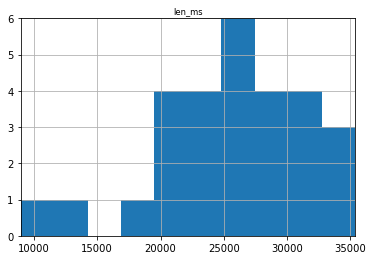

In [94]:
def sess_bout_summary(bout_pd: pd.DataFrame, ax_dict: dict=None, bouts_type='curated', min_len_ms=7000) -> pd.DataFrame:
    ## make and plot a summary of the bird's bout.
    # get lengths of the bouts
    # get estimate timestamps of bouts
    # plot histogram length of bouts
    # histogram of time of bouts
    bout_sel = (bout_pd['valid']==True) & (bout_pd['len_ms'] > min_len_ms);
    if bouts_type=='curated':
        bout_sel = bout_sel & (bout_pd['bout_check']==True) & (bout_pd['confusing']==False);
    
    # len/time? (when do they sing the longest?)
    logger.info('Number of bouts: {}'.format(bout_pd.loc[bout_sel].index.size))
    logger.info('Length of all bouts (minutes): {}'.format(bout_pd.loc[bout_sel, 'len_ms'].values.sum()/60000))
    
    if ax_dict is None:
        bout_pd.loc[bout_sel].hist(column='len_ms')
    return bout_pd

bpd = sess_bout_summary(bpd)

### Update and plot the summary so far

In [95]:
%matplotlib inline

In [96]:
reload(sb)
#all_meta_pd, all_bout_pd = sb.load_all_bouts(sess_par)
all_meta_pd, all_bout_pd = sb.update_bouts(sess_par)

2023-03-07 09:48:53,999 ceciestunepipe.pipeline.searchbout INFO     Looking for all sessions with bouts detected/curated for bird s_b1496_23
2023-03-07 09:48:53,999 ceciestunepipe.pipeline.searchbout INFO     Looking for all sessions with bouts detected/curated for bird s_b1496_23
2023-03-07 09:48:54,000 ceciestunepipe.pipeline.searchbout INFO     Loading bout summary dataframe
2023-03-07 09:48:54,000 ceciestunepipe.pipeline.searchbout INFO     Loading bout summary dataframe
2023-03-07 09:48:54,003 ceciestunepipe.pipeline.searchbout INFO     Meta, bout summary path is /mnt/sphere/speech_bci/processed_data/s_b1496_23/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle, /mnt/sphere/speech_bci/processed_data/s_b1496_23/all-sess-01/alsa/bouts_ceciestunepipe/bout_summary_df.pickle
2023-03-07 09:48:54,003 ceciestunepipe.pipeline.searchbout INFO     Meta, bout summary path is /mnt/sphere/speech_bci/processed_data/s_b1496_23/all-sess-01/alsa/bouts_ceciestunepipe/bout_meta_df.pickle, /mnt

s_b1496_23


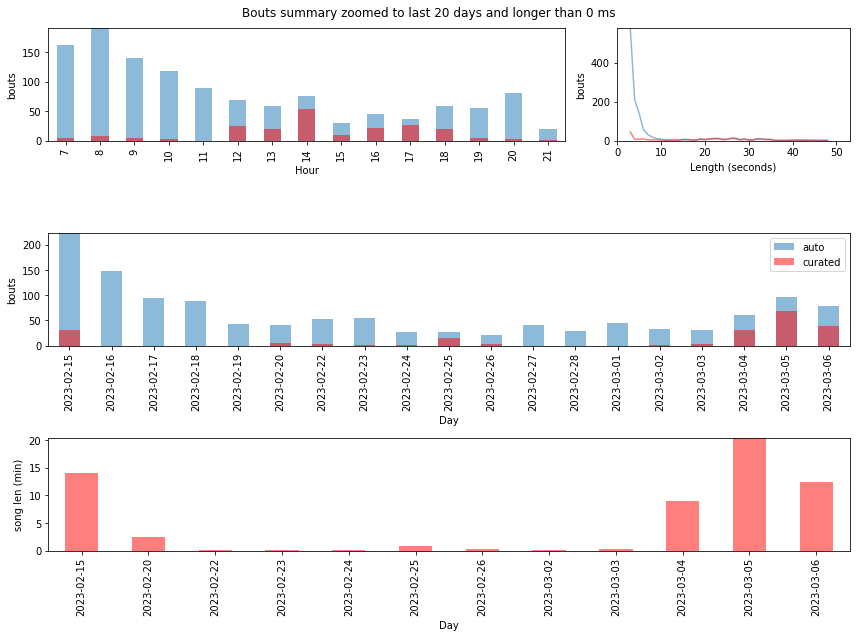

In [97]:
print(sess_par['bird'])
ax_dict = sb.plot_bout_stats(all_bout_pd, zoom_days=20)

## Play White Noise Visualize Example

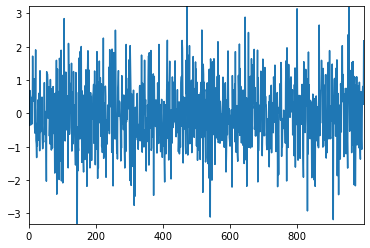

In [5]:
# Example
# Generate gaussian white noise
mean = 0 #define a mean
std = 1 #define standard deviation
num_samples = 1000 #define number of samples that you want to pull from the guassian 
samples = np.random.normal(mean, std, size=num_samples) #generate random #num_samples
plt.plot(samples) #plot to visualize it



In [6]:
# pip install wavio

In [7]:
# pip install pydub

## Create a class to generate a gaussian white noise .wav file

In [53]:
# From https://github.com/stackbuffer/whitenoise/blob/main/whitenoise.py
# gh repo clone stackbuffer/whitenoise
#import modules
import wavio
from pydub import AudioSegment
from pydub.playback import play

#initialize a class defininn samples, sample rate, and the wav file name
class WhiteNoise:
    def __init__(self, samples, samplerate, filename):
        self.samples = samples # number of samples you want 
        self.samplerate = samplerate #sample rate you want
        self.filename = filename # provide a file name


    def generate(self): #initialize a function to generate the white noise
        x = [] #create empty list x
        l = [] #create empty list l
        mean = 0 #define a mean
        std = 1 #define standard deviation

#         x.append(np.random.random(size = self.samples)) #create the white noise from original file
        x.append(np.random.normal(mean, std, size = self.samples)) # create gaussian noise as seen in the example above

        for i in x: #iterate list x
            for j in i: #for each element of x
                l.append(j) #append it to list l

        l = np.array(l) #turn list x into a numpy array

        wavio.write(self.filename, l, self.samplerate, sampwidth=2) #write/create the .wav file


    def playNoise(self): #define a function to play the audio
        song = AudioSegment.from_wav(self.filename)
        play(song)


#change number of samples to vary the length of the noise.wav file i.e., 300,000 samples = 6 seconds of noise, 500,000 samples = 11 seconds of noise
noise = WhiteNoise(300000, 44100, "noise.wav") #define the noise with params samples, sample rate, file names
noise.generate() #generate the noise
noise.playNoise() #play the noise

/mnt/cube/finch/ceciestunepipe/lib/python3.8/site-packages/wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


## Play the noise.wav file created in the previous code

In [54]:
import IPython
IPython.display.Audio('noise.wav')

## Austin Learning

In [ ]:
?? sb.plot_bout_stats

In [ ]:
all_bout_pd.shape

In [ ]:
def testadd(x: int, y: int, k: int=10)-> int:
    z = x + y + k
    return z

In [ ]:
h = 1
j = 2.2
p = 12
m = testadd(h,j, p)
print(m)

In [ ]:
all_bout_pd.head()

In [ ]:
print(all_bout_pd['day'])

In [ ]:
fig = px.line(all_bout_pd['day'])
fig.show()

In [ ]:
all_bout_pd.groupby(all_bout_pd['datetime'].dt.time)['bout_auto'].sum().plot(kind='bar', alpha=0.5, label='auto')